In [1]:
import numpy
import xgboost as xb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import json 
import matplotlib.pyplot as plt
import datetime as dt

In [20]:
d1 = pd.read_csv('student-mat.csv',sep=';')
d2 = pd.read_csv('student-por.csv',sep=';')
mp = {'sex':{'M':0,'F':1},'address':{'U':1,'R':0},'famsize':{'LE3':1,'GT3':0},'Pstatus':{'T':1,'A':0},'schoolsup':{'yes':1,'no':0},'famsup':{'yes':1,'no':0},'paid':{'yes':1,'no':0},'activities':{'yes':1,'no':0},'nursery':{'yes':1,'no':0},'higher':{'yes':1,'no':0},'internet':{'yes':1,'no':0},'romantic':{'yes':1,'no':0}}
d1 = d1.replace(mp)
d1 = d1.drop(['school','Mjob','Fjob','reason','guardian'],axis=1)
d1['age'] -= 11
ddf = pd.read_csv('kids_data.csv')
#ddf = ddf.replace({'gender':{'m':0,'f':1}})
#ddf['handicapped'] = ddf['handicapped'].astype(int)
ddf['urban'] = ddf['urban'].astype(int)
ddf.to_csv("data-add.csv")
ddf['date'] = pd.to_datetime(ddf['date'])
ddf['date'] = (ddf['date'] - dt.datetime(1970,1,1)).dt.total_seconds()/3600
new_df = pd.DataFrame()
ddf = ddf.sort_values(by=['aadhar_id'])

In [21]:
train=d1.sample(frac=0.8,random_state=10000)
test=d1.drop(train.index)

In [22]:
y_train = train[['G3']]
x_train = train.drop(['G3'],axis=1)
y_test = test[['G3']]
x_test = test.drop(['G3'],axis=1)

[0]	validation_0-rmse:9.96691	validation_1-rmse:9.55347
[1]	validation_0-rmse:9.02058	validation_1-rmse:8.68576
[2]	validation_0-rmse:8.16732	validation_1-rmse:7.9058
[3]	validation_0-rmse:7.38762	validation_1-rmse:7.20239
[4]	validation_0-rmse:6.69394	validation_1-rmse:6.57646
[5]	validation_0-rmse:6.07272	validation_1-rmse:6.04251
[6]	validation_0-rmse:5.50385	validation_1-rmse:5.55059
[7]	validation_0-rmse:4.99327	validation_1-rmse:5.10022
[8]	validation_0-rmse:4.53182	validation_1-rmse:4.71954
[9]	validation_0-rmse:4.11301	validation_1-rmse:4.36815
[10]	validation_0-rmse:3.74242	validation_1-rmse:4.04961
[11]	validation_0-rmse:3.41087	validation_1-rmse:3.79989
[12]	validation_0-rmse:3.11937	validation_1-rmse:3.56665
[13]	validation_0-rmse:2.85853	validation_1-rmse:3.36764
[14]	validation_0-rmse:2.62501	validation_1-rmse:3.20003
[15]	validation_0-rmse:2.41516	validation_1-rmse:3.07867
[16]	validation_0-rmse:2.21687	validation_1-rmse:2.9739
[17]	validation_0-rmse:2.03969	validation_1

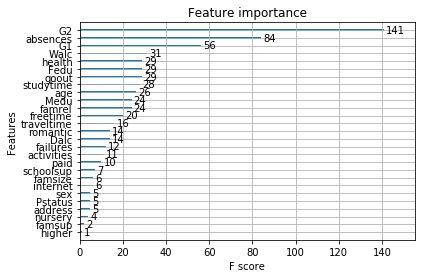

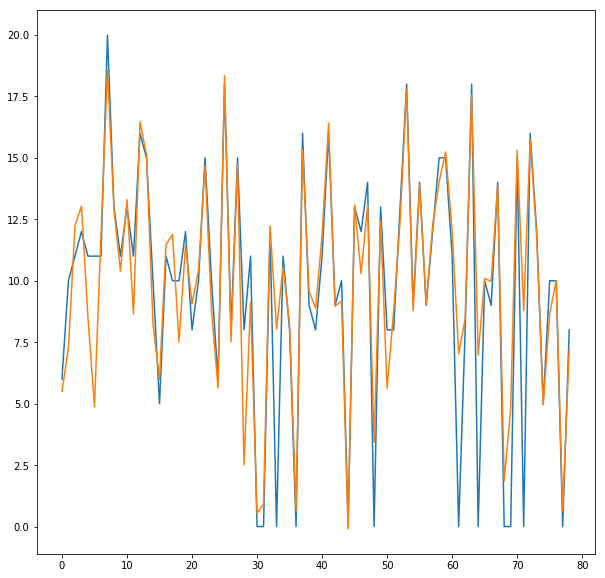

In [27]:
model = xb.XGBRegressor(eta=0.0001,max_depth=5,gamma=2,subsample=0.6)
model.fit(x_train,y_train,eval_set=[(x_train, y_train), (x_test, y_test)], eval_metric='rmse', verbose=True)
pred = model.predict(x_test)
x_ar = range(len(x_test))
y_ar = []
for i in y_test['G3']:
    y_ar.append(i)
plt.figure(111,[10,10])
plt.subplot(111)
plt.plot(x_ar,y_ar)
plt.plot(x_ar,pred)
xb.plot_importance(model)